In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
# 데이터 불러오기
df = pd.read_csv("./AAME.csv")
df.head

<bound method NDFrame.head of              Date  Open  High   Low  Close  Adj Close  Volume
0      1980-03-17  0.00  4.05  3.85   3.85   3.213167   15000
1      1980-03-18  0.00  4.00  3.80   3.80   3.171437   10200
2      1980-03-19  0.00  4.05  3.85   3.85   3.213167   33500
3      1980-03-20  0.00  4.00  3.80   3.80   3.171437    8700
4      1980-03-21  0.00  3.95  3.75   3.75   3.129709   12700
...           ...   ...   ...   ...    ...        ...     ...
10093  2020-03-26  2.29  2.29  2.08   2.28   2.280000    1600
10094  2020-03-27  2.25  2.25  2.21   2.25   2.250000     500
10095  2020-03-30  2.25  2.25  2.13   2.13   2.130000     400
10096  2020-03-31  2.11  2.11  2.11   2.11   2.110000     300
10097  2020-04-01  2.11  2.15  2.11   2.15   2.150000     600

[10098 rows x 7 columns]>

In [7]:
# 날짜는 제거하고 'Adj Close'만 사용
data = df['Adj Close'].values.reshape(-1, 1)

In [9]:
# 정규화
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [11]:

# 시퀀스 데이터 생성
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

SEQ_LEN = 30  # 시퀀스 길이
X, y = create_sequences(data_scaled, SEQ_LEN)


In [13]:
# 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [17]:
# RNN 모델
rnn_model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(SEQ_LEN, 1)),
    Dense(1)
])
rnn_model.compile(optimizer='adam', loss='mse')

C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
# 학습
rnn_model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=1)

Epoch 1/10
504/504 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0025
Epoch 2/10
504/504 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.5805e-04
Epoch 3/10
504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1715e-04
Epoch 4/10
504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0673e-04
Epoch 5/10
504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0493e-04
Epoch 6/10
504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2166e-04
Epoch 7/10
504/504 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9.9851e-05
Epoch 8/10
504/504 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.0510e-04
Epoch 9/10
504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.9627e-05
Epoch 10/10
504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0608e-04


In [21]:
# LSTM 모델
lstm_model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(SEQ_LEN, 1)),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

# 학습
lstm_model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=1)


Epoch 1/10


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


504/504 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0060
Epoch 2/10
504/504 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2.6425e-04
Epoch 3/10
504/504 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.9620e-04
Epoch 4/10
504/504 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.7288e-04
Epoch 5/10
504/504 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.5230e-04
Epoch 6/10
504/504 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.4402e-04
Epoch 7/10
504/504 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.3423e-04
Epoch 8/10
504/504 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.2136e-04
Epoch 9/10
504/504 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.1006e-04
Epoch 10/10
504/504 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.1317e-04


In [23]:
# 예측 및 복원
rnn_pred = scaler.inverse_transform(rnn_model.predict(X_test))
lstm_pred = scaler.inverse_transform(lstm_model.predict(X_test))
y_test_actual = scaler.inverse_transform(y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


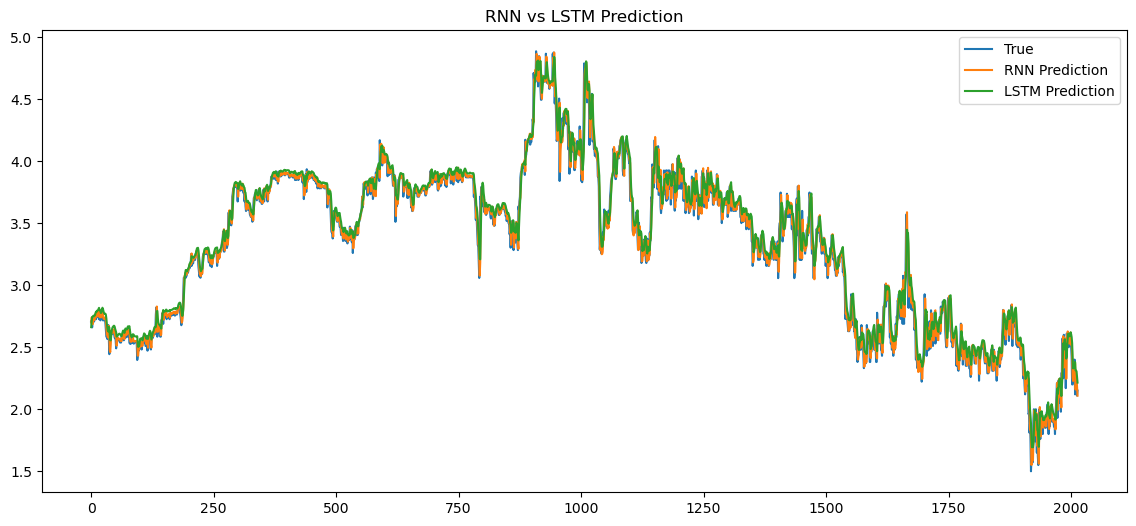

In [25]:

# 시각화
plt.figure(figsize=(14, 6))
plt.plot(y_test_actual, label='True')
plt.plot(rnn_pred, label='RNN Prediction')
plt.plot(lstm_pred, label='LSTM Prediction')
plt.legend()
plt.title("RNN vs LSTM Prediction")
plt.show()